# Required Header Files

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression

import pandas as pd
import seaborn as sns
import matplotlib
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=22,10


# Reading Excel File

In [75]:
df=pd.read_excel("fd.xlsx")

In [76]:
df

,Count_Start_Date,Seven_Day_ADT
0,2012-05-25,1603.428571
1,2012-07-15,15659.857143
2,2012-07-16,5230.857143
3,2012-07-16,5820.571429
4,2012-07-16,16457.714286
...,...,...
12426,2019-05-24,2209.285714
12427,2019-05-24,2080.000000
12428,2019-08-30,8772.857143
12429,2019-10-15,232.571429


# Locating NULL Values in the Dataset

In [77]:

col_mask=df.isnull().any(axis=0) 
row_mask=df.isnull().any(axis=1)
df.loc[row_mask,col_mask]

,Count_Start_Date,Seven_Day_ADT
5856,NaT,NaN
10155,2018-09-14,NaN


# Removing the NULL Values

In [78]:
df.drop(5856, inplace=True)
df.drop(10155,inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12429 entries, 0 to 12430
Data columns (total 2 columns):
Count_Start_Date    12429 non-null datetime64[ns]
Seven_Day_ADT       12429 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 291.3 KB


# Dropping Duplicate Rows

In [44]:
df = df.drop_duplicates(subset='Count_Start_Date', keep='first')

In [45]:
df

,Count_Start_Date,Seven_Day_ADT
0,2012-05-25,1603.428571
1,2012-07-15,15659.857143
2,2012-07-16,5230.857143
18,2012-07-18,546.714286
25,2012-07-19,1054.428571
...,...,...
12392,2019-09-20,3000.571429
12393,2019-09-24,2894.000000
12396,2019-10-14,12771.857143
12400,2019-08-12,2209.714286


In [46]:
df.Count_Start_Date = pd.to_datetime(df.Count_Start_Date)
df.set_index('Count_Start_Date', inplace=True)

/Users/appleretina/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [47]:
df.head

<bound method NDFrame.head of                   Seven_Day_ADT
Count_Start_Date               
2012-05-25          1603.428571
2012-07-15         15659.857143
2012-07-16          5230.857143
2012-07-18           546.714286
2012-07-19          1054.428571
...                         ...
2019-09-20          3000.571429
2019-09-24          2894.000000
2019-10-14         12771.857143
2019-08-12          2209.714286
2019-10-15           232.571429

[1476 rows x 1 columns]>

# Daily Count Plot


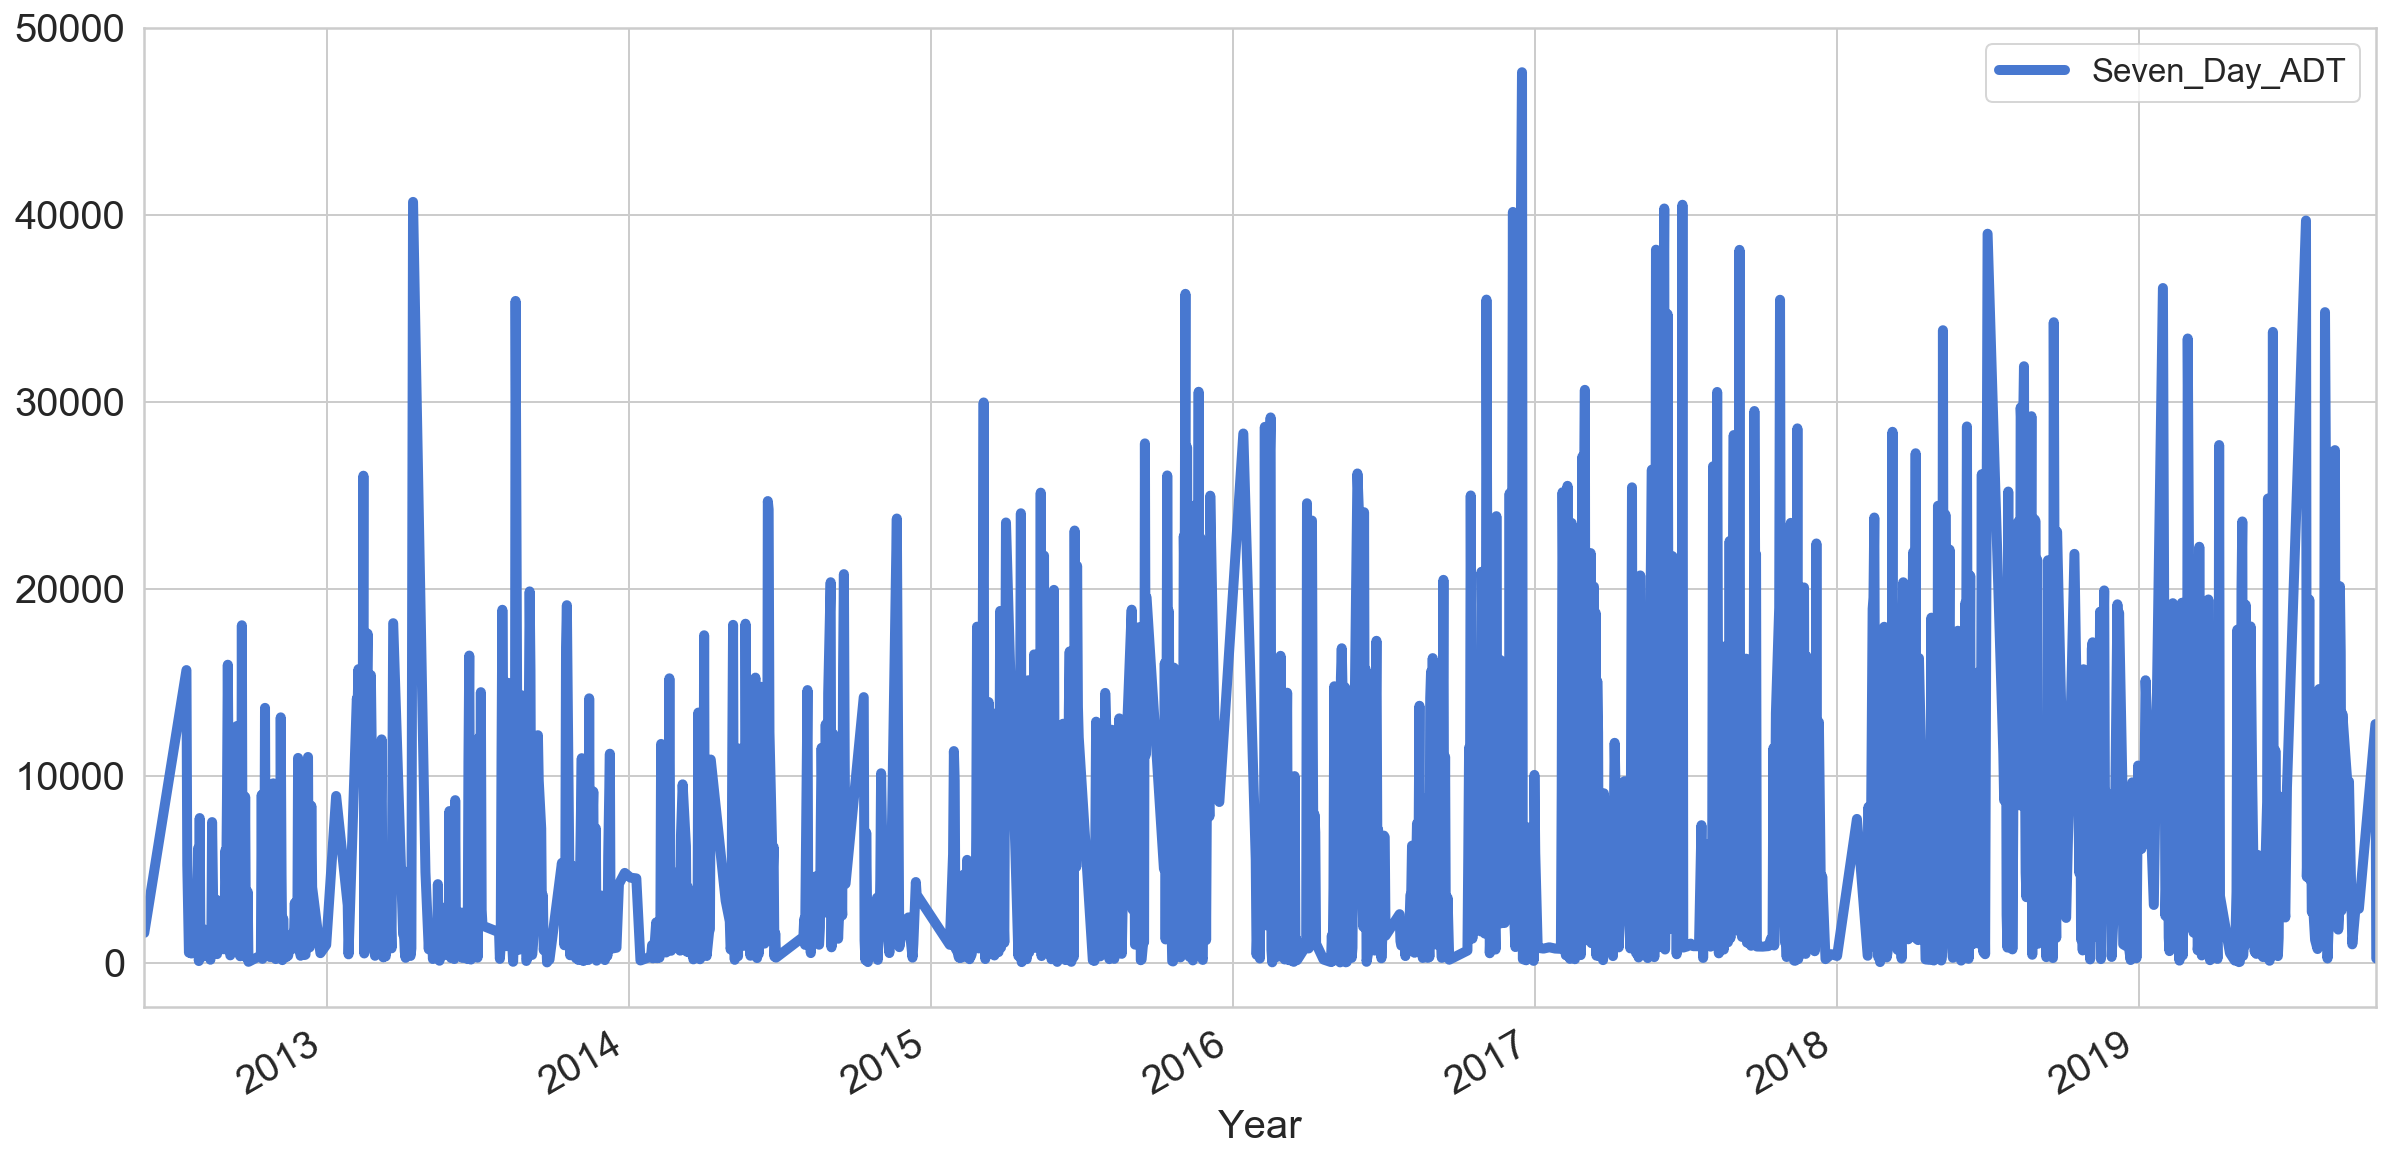

In [48]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlim('2012-05-25', '2019-10-15')
plt.xlabel('Year', fontsize=20);

# Daily Count Rolling Averages

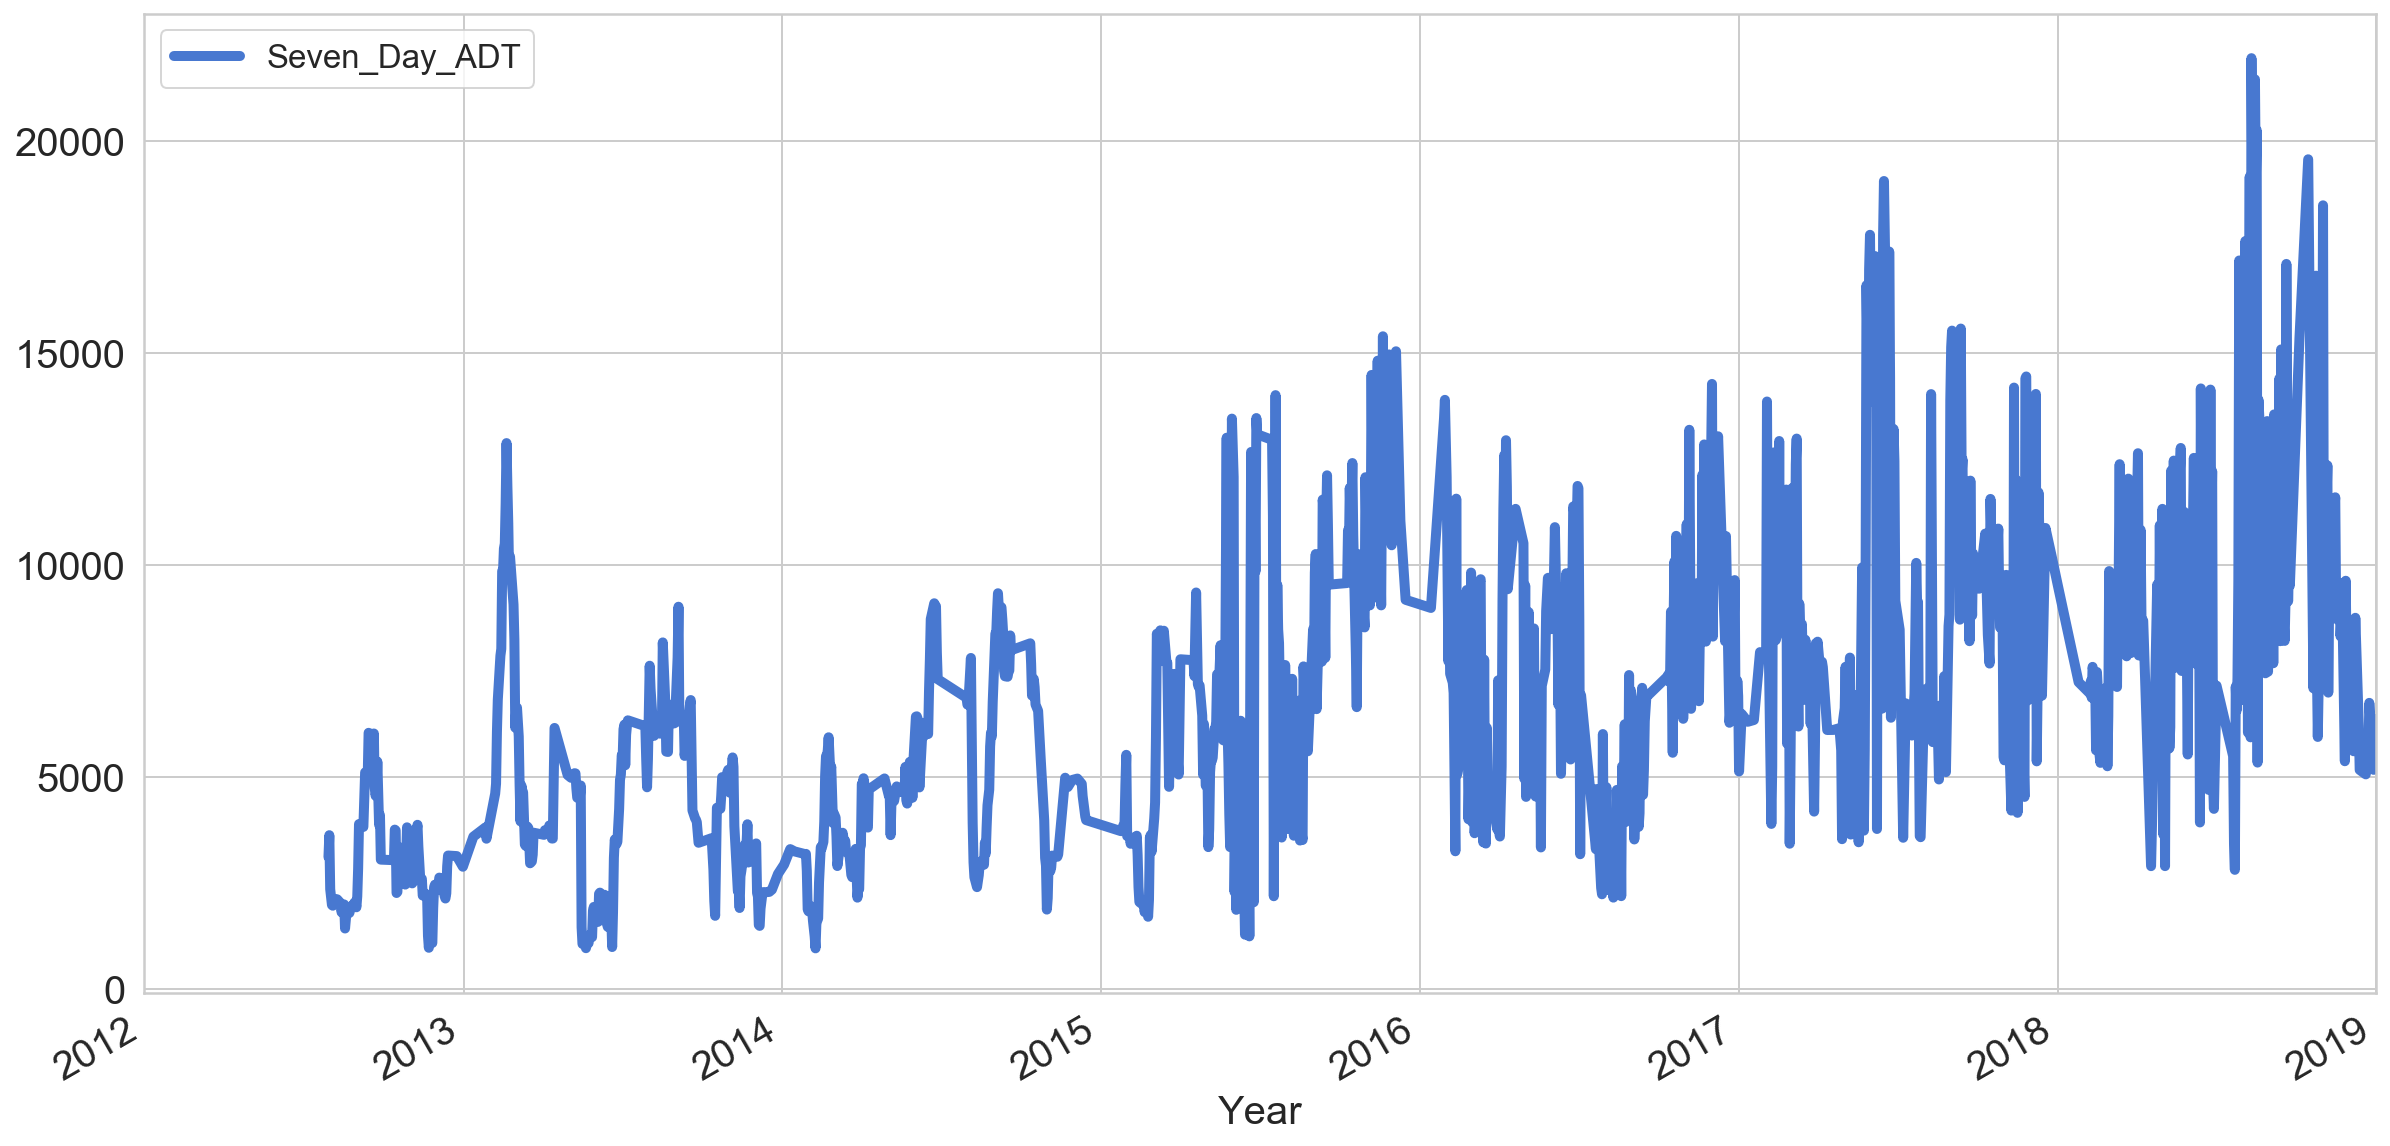

In [49]:
Seven_Day_ADT = df[['Seven_Day_ADT']]
Seven_Day_ADT.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlim('2012', '2019')

plt.xlabel('Year', fontsize=20);

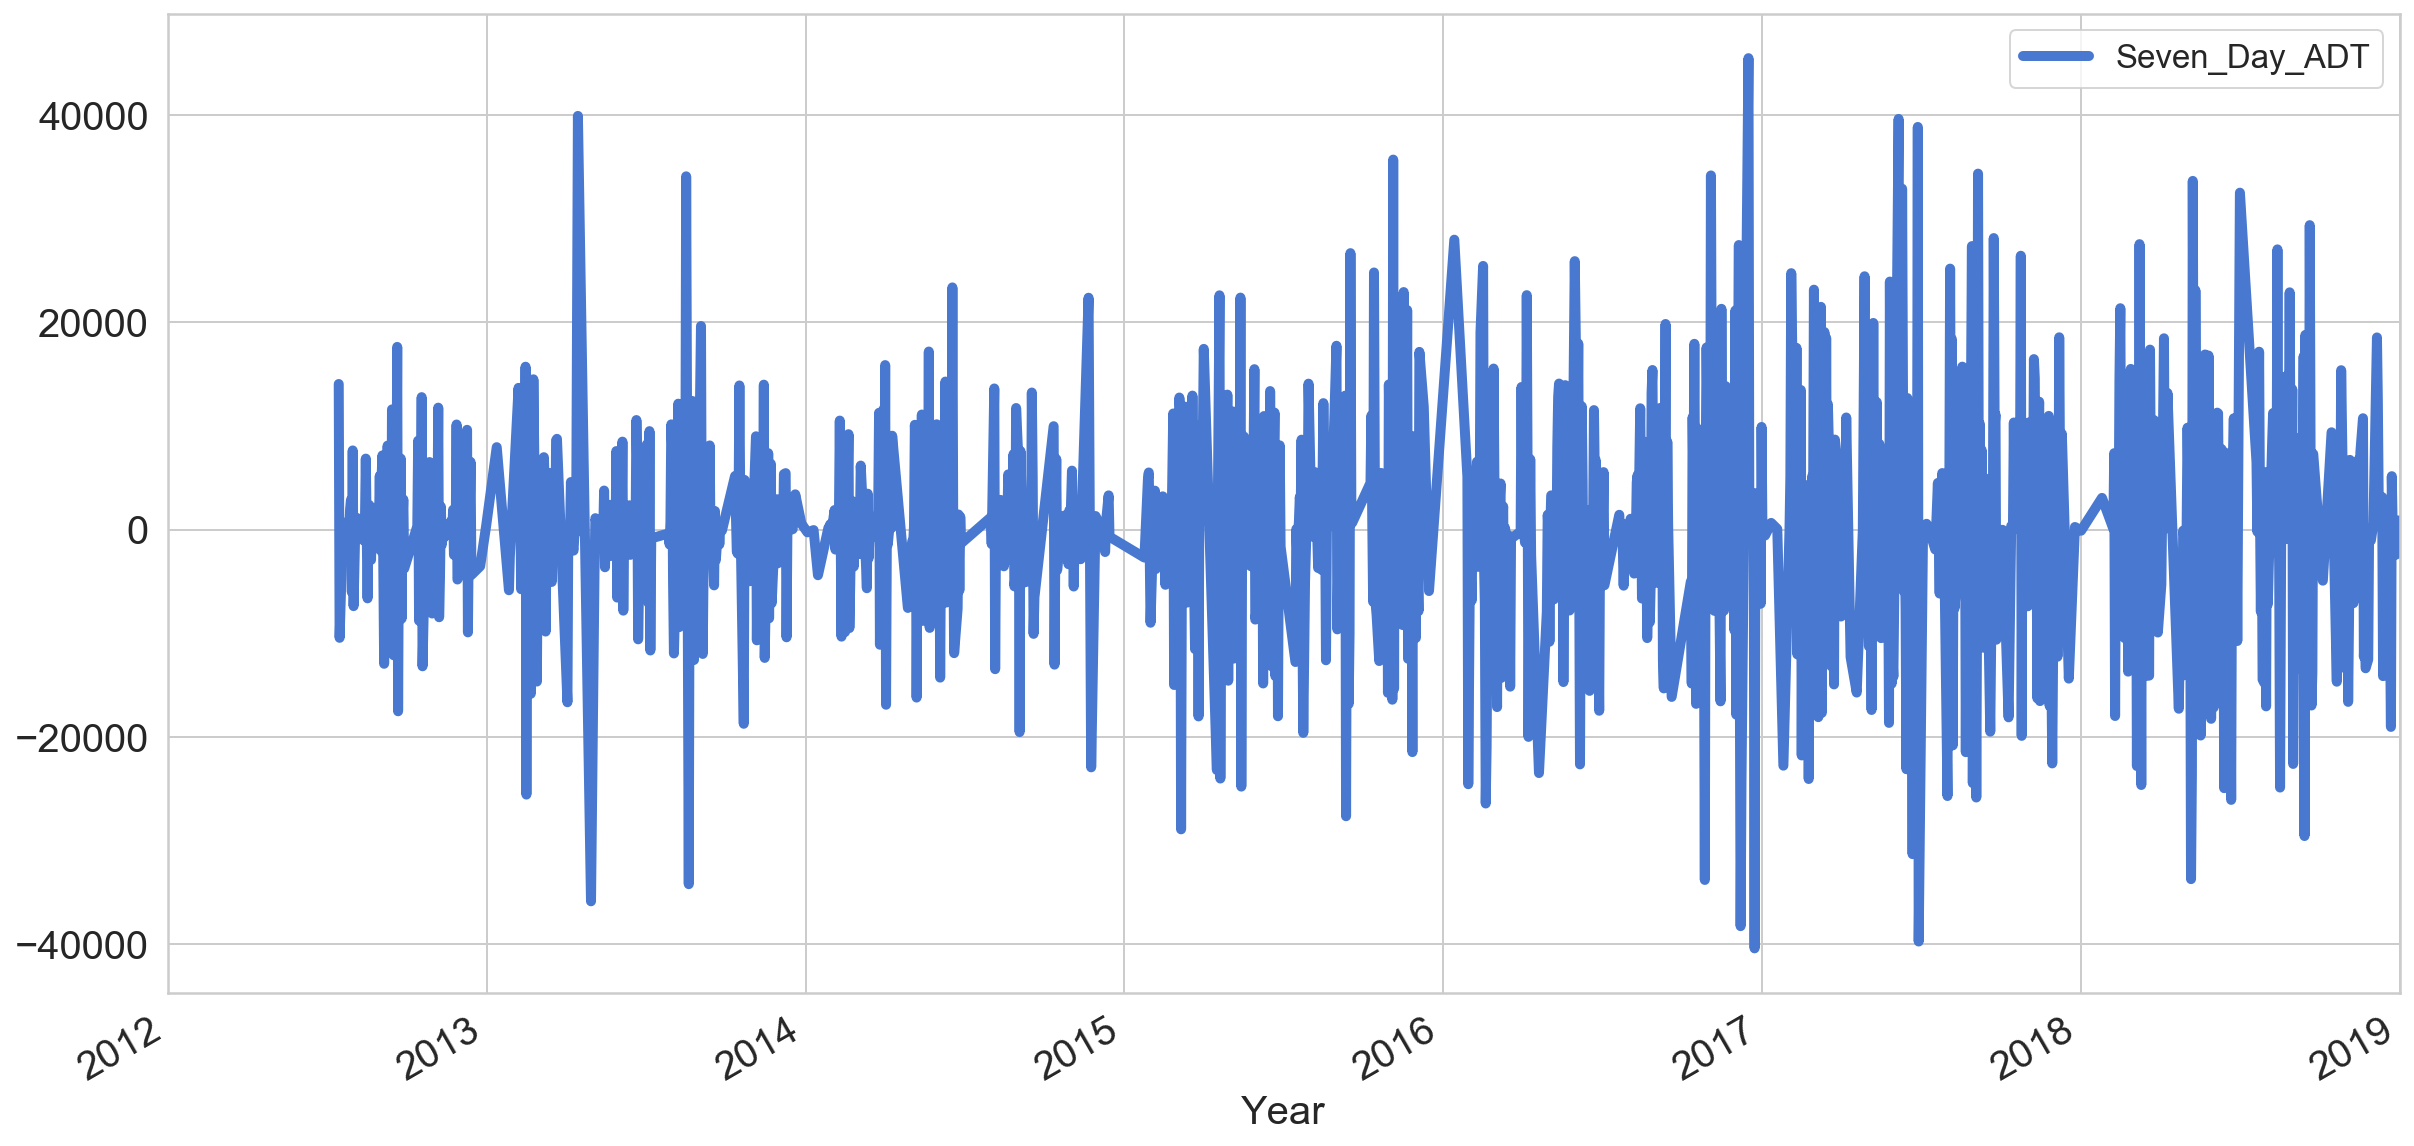

In [50]:
Seven_Day_ADT.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlim('2012', '2019')
plt.xlabel('Year', fontsize=20);

In [51]:
df.corr()

,Seven_Day_ADT
Seven_Day_ADT,1.0


In [52]:
df.diff().corr()

,Seven_Day_ADT
Seven_Day_ADT,1.0


In [53]:
df = df.reset_index()

In [54]:
df

,Count_Start_Date,Seven_Day_ADT
0,2012-05-25,1603.428571
1,2012-07-15,15659.857143
2,2012-07-16,5230.857143
3,2012-07-18,546.714286
4,2012-07-19,1054.428571
...,...,...
1471,2019-09-20,3000.571429
1472,2019-09-24,2894.000000
1473,2019-10-14,12771.857143
1474,2019-08-12,2209.714286


# Train and Test Data Set Preparation

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train, test = train_test_split(df, test_size=0.30,random_state=0)

# Linear Regression Implementation

In [57]:
from sklearn.linear_model import LinearRegression



In [58]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Seven_Day_ADT']

In [59]:
model = LinearRegression()


In [60]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Slope and Intercept Calculation

In [61]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
print('Intercept: ', model.intercept_)


Slope:  4.735869316912478
Intercept:  3286.868074104559


/Users/appleretina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


# Predicted vs Actual ADT

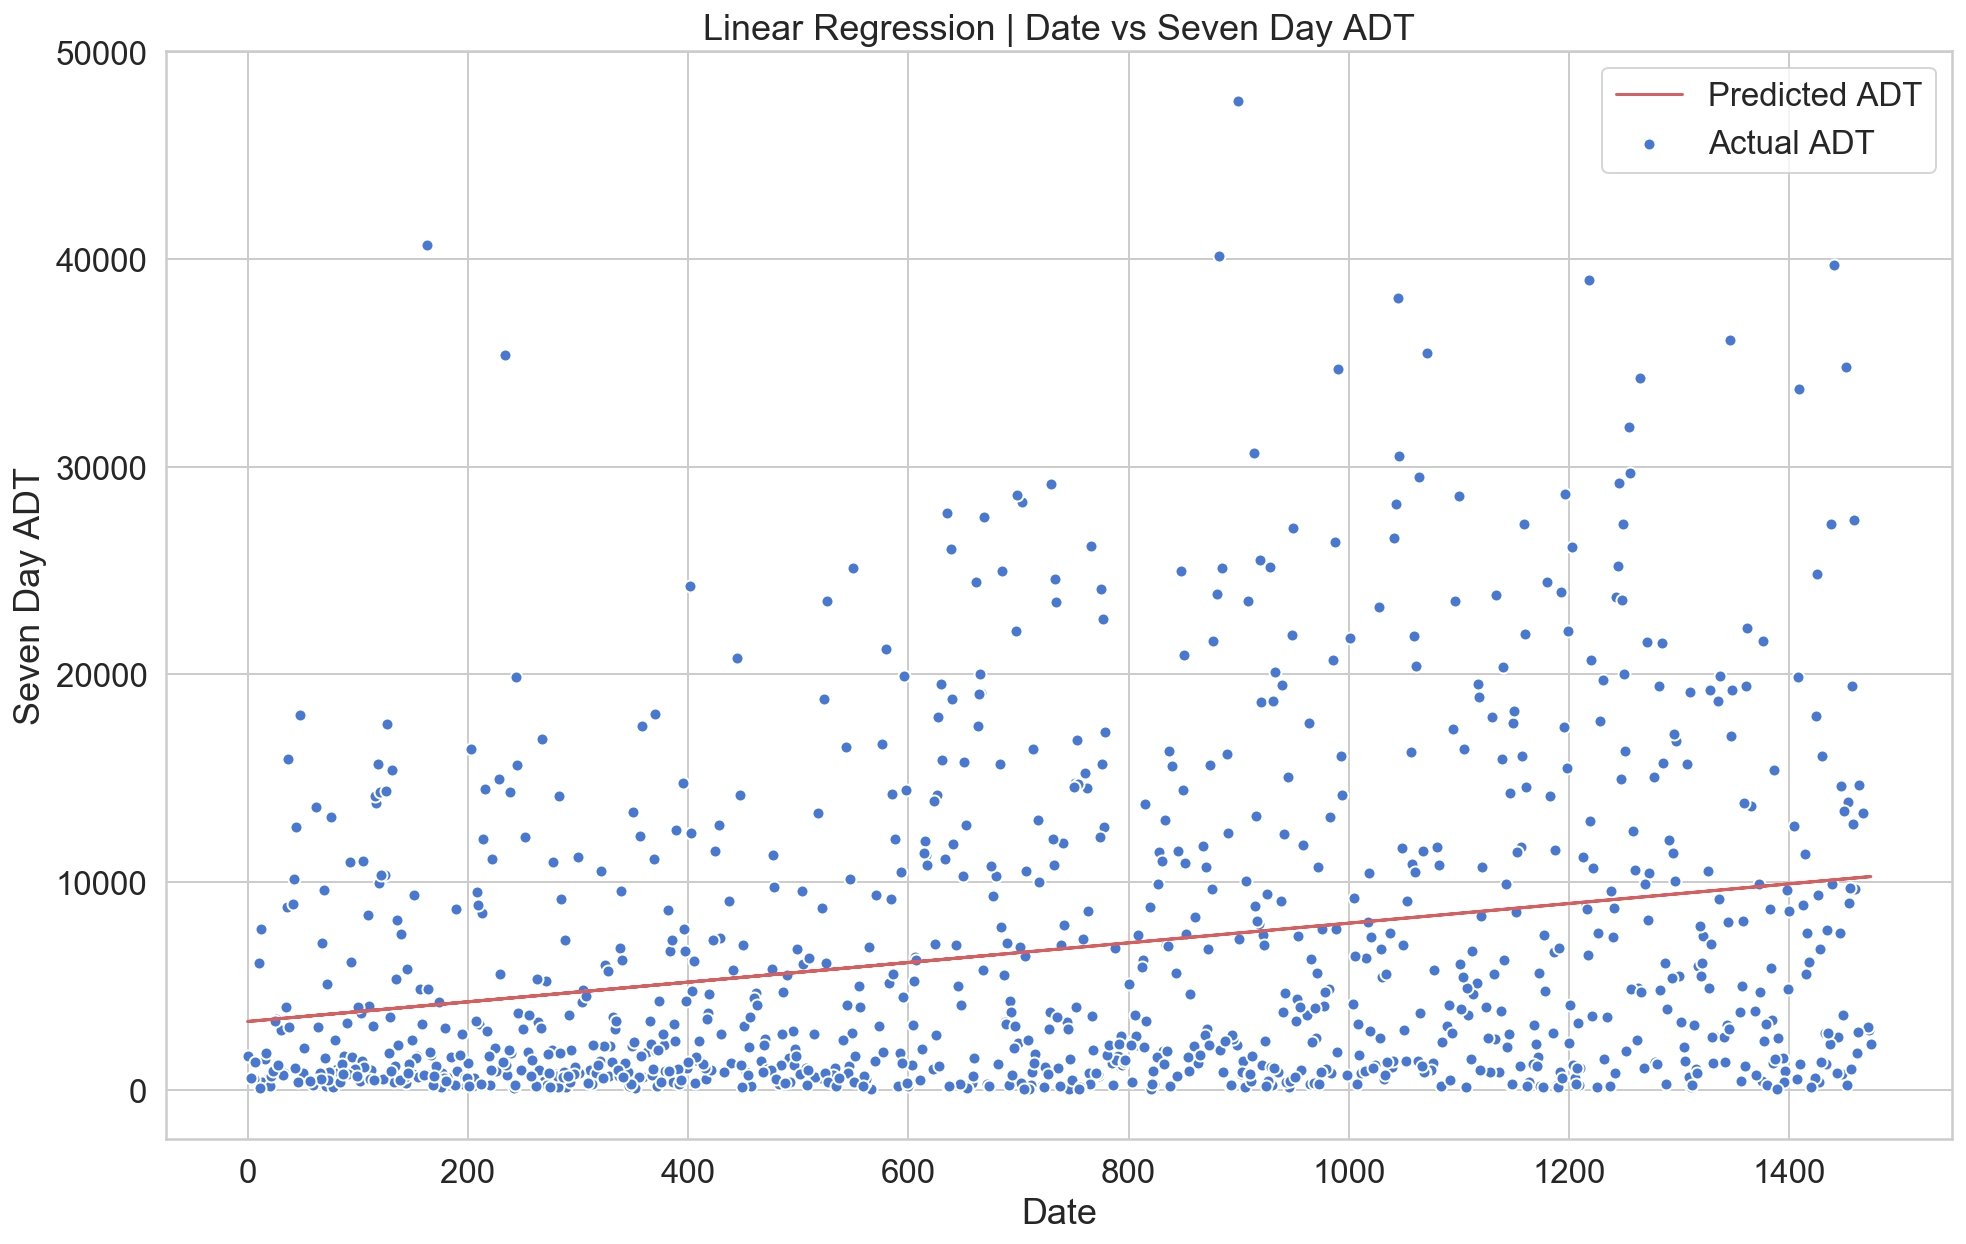

In [62]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Date vs Seven Day ADT')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual ADT')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted ADT')
plt.xlabel('Date')
plt.ylabel('Seven Day ADT')
plt.legend()
plt.show()

In [63]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Seven_Day_ADT']

In [64]:

#df = df.reset_index()

In [65]:
y_pred = model.predict(X_test)

# Actual and Predicted Values

In [66]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
563,4111.571429,5953.162500
824,983.571429,7189.224391
436,7057.142857,5351.707096
1042,867.000000,8221.643902
644,494.142857,6336.767914
...,...,...
722,1016.571429,6706.165721
553,3629.714286,5905.803806
77,4687.571429,3651.530012
621,2834.857143,6227.842920


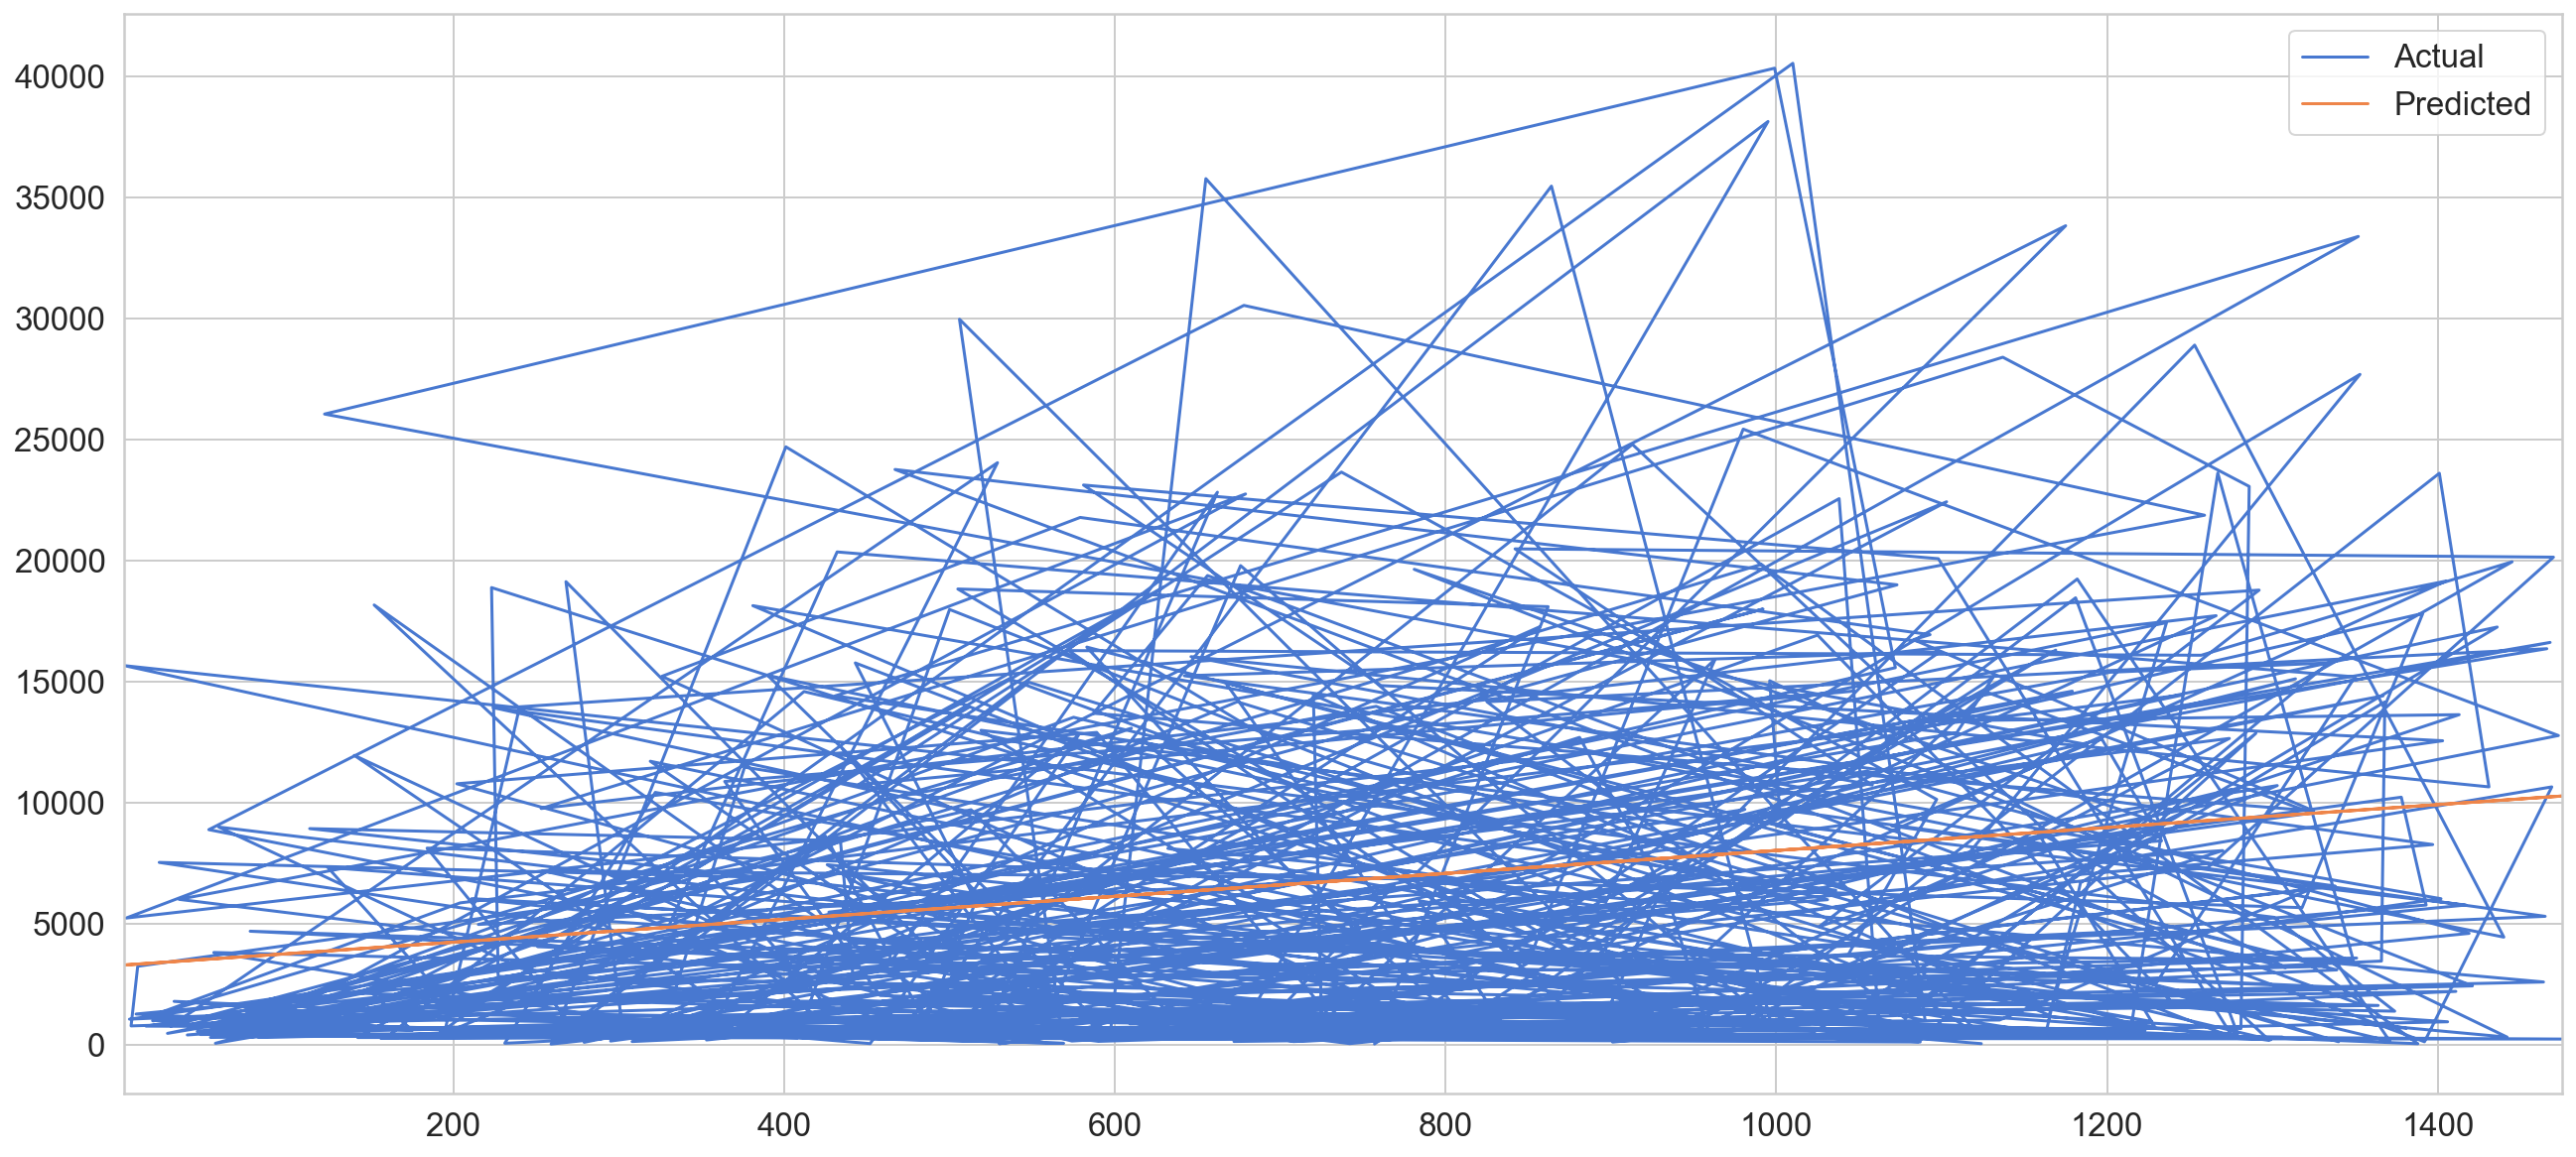

In [80]:
data.plot()


# Error Calculation


In [67]:
from sklearn import metrics

In [68]:
df['Seven_Day_ADT'].describe()

count     1476.000000
mean      6955.248258
std       7992.754122
min         25.428571
25%        902.571429
50%       3491.714286
75%      10831.357143
max      47630.142857
Name: Seven_Day_ADT, dtype: float64

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6137.149142445835
Mean Squared Error: 62764355.659284584
Root Mean Squared Error: 7922.395828238108


In [70]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_train)

result=model1.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          Seven_Day_ADT   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.432
Method:                 Least Squares   F-statistic:                              788.0
Date:                Tue, 25 Feb 2020   Prob (F-statistic):                   2.76e-129
Time:                        10:04:13   Log-Likelihood:                         -10730.
No. Observations:                1033   AIC:                                  2.146e+04
Df Residuals:                    1032   BIC:                                  2.147e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------